In [2]:
reset -fs

In [3]:
from graphviz import Digraph

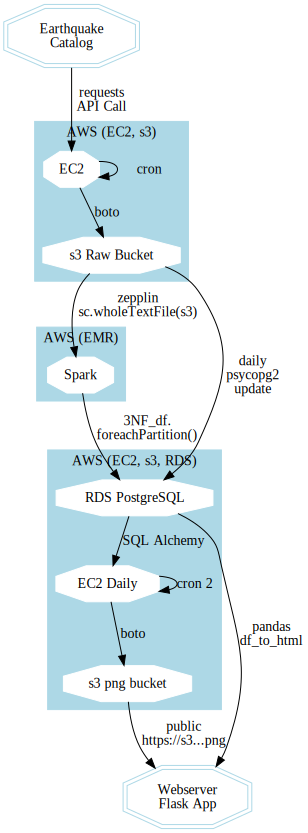

In [79]:
g = Digraph(comment='ShakeyShakeyShakey')
g.graph_attr['rankdir'] = 'TD'

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=lightblue')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "     AWS (EC2, s3)"')
aws.node('EC2', shape='octagon')
aws.node('s3 Raw Bucket', shape='octagon')

g.subgraph(aws)

emr = Digraph('cluster_1')
emr.body.append('style=filled')
emr.body.append('color=lightblue')
emr.node_attr.update(style='filled', color='white')
emr.body.append('label = "AWS (EMR)"')
emr.node('Spark', shape='octagon')

g.subgraph(emr)

aws2 = Digraph('cluster_2')
aws2.body.append('style=filled')
aws2.body.append('color=lightblue')
aws2.node_attr.update(style='filled', color='white')
aws2.body.append('label = "AWS (EC2, s3, RDS)"')
aws2.node('EC2 Daily', shape='octagon')
aws2.node('s3 png bucket', shape='octagon')
aws2.node('RDS PostgreSQL', shape='octagon')

g.subgraph(aws2)

g.node('Earthquake \n Catalog', shape='doubleoctagon', color='lightblue')
g.node('Webserver \n Flask App', shape='doubleoctagon', color='lightblue')
g.edge('EC2', 'EC2', 'cron           ')
g.edge('Earthquake \n Catalog', 'EC2', '   requests \n  API Call')
g.edge('EC2', 's3 Raw Bucket', 'boto')
g.edge('s3 Raw Bucket', 'Spark', 'zepplin \n sc.wholeTextFile(s3)')
g.edge('Spark', 'RDS PostgreSQL', '3NF_df. \n foreachPartition()')
g.edge('s3 Raw Bucket', 'RDS PostgreSQL', 'daily \n psycopg2 \n update')
g.edge('RDS PostgreSQL', 'Webserver \n Flask App', 'pandas \n df_to_html')
g.edge('RDS PostgreSQL', 'EC2 Daily', 'SQL Alchemy')
g.edge('s3 png bucket', 'Webserver \n Flask App', 'public \n https://s3...png')
g.edge('EC2 Daily','s3 png bucket', 'boto')
g.edge('EC2 Daily', 'EC2 Daily', 'cron 2')

g

In [80]:
g.render('dag')

'dag.pdf'

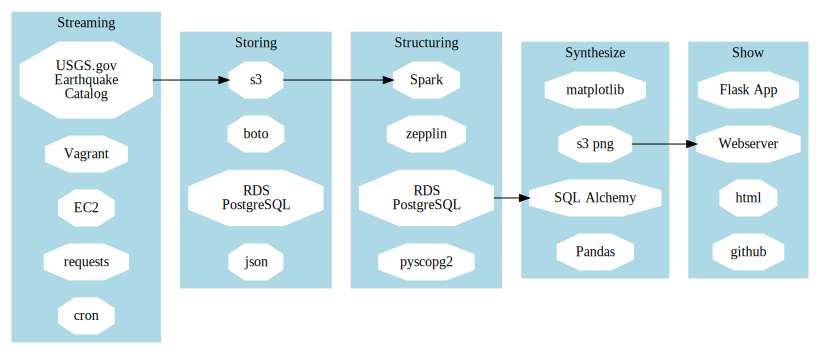

In [100]:
s = Digraph(comment='SSSSS')
s.graph_attr['rankdir'] = 'LR'

stream = Digraph('cluster_0')
stream.body.append('style=filled')
stream.body.append('color=lightblue')
stream.node_attr.update(style='filled', color='white')
stream.body.append('label = "Streaming"')
stream.node('USGS.gov \n Earthquake \n Catalog', shape='octagon')
stream.node('Vagrant', shape='octagon')
stream.node('EC2', shape='octagon')
stream.node('requests', shape='octagon')
stream.node('cron', shape='octagon')

s.subgraph(stream)

store = Digraph('cluster_1')
store.body.append('style=filled')
store.body.append('color=lightblue')
store.node_attr.update(style='filled', color='white')
store.body.append('label = "Storing"')
store.node('s3', shape='octagon')
store.node('boto', shape='octagon')
store.node('RDS \n PostgreSQL', shape='octagon')
store.node('json', shape='octagon')

s.subgraph(store)

struct = Digraph('cluster_2')
struct.body.append('style=filled')
struct.body.append('color=lightblue')
struct.node_attr.update(style='filled', color='white')
struct.body.append('label = "Structuring"')
struct.node('Spark', shape='octagon')
struct.node('zepplin', shape='octagon')
struct.node('RDS  \n PostgreSQL', shape='octagon')
struct.node('pyscopg2', shape='octagon')

s.subgraph(struct)

synth = Digraph('cluster_3')
synth.body.append('style=filled')
synth.body.append('color=lightblue')
synth.node_attr.update(style='filled', color='white')
synth.body.append('label = "Synthesize"')
synth.node('matplotlib', shape='octagon')
synth.node('s3 png', shape='octagon')
synth.node('SQL Alchemy', shape='octagon')
synth.node('Pandas', shape='octagon')

s.subgraph(synth)

show = Digraph('cluster_4')
show.body.append('style=filled')
show.body.append('color=lightblue')
show.node_attr.update(style='filled', color='white')
show.body.append('label = "Show"')
show.node('Flask App', shape='octagon')
show.node('Webserver', shape='octagon')
show.node('html', shape='octagon')
show.node('github', shape='octagon')

s.subgraph(show)

s.edge('USGS.gov \n Earthquake \n Catalog', 's3')
s.edge('s3', 'Spark')
s.edge('RDS  \n PostgreSQL', 'SQL Alchemy')
s.edge('s3 png', 'Webserver')

s

In [101]:
s.render("5 S's")

"5 S's.pdf"